---------------------------------------------------------------
第1代的最优值为9,全局最优值为9
第2代的最优值为9,全局最优值为9
第3代的最优值为8,全局最优值为9
第4代的最优值为8,全局最优值为9
第5代的最优值为8,全局最优值为9
第6代的最优值为8,全局最优值为9
第7代的最优值为9,全局最优值为9
第8代的最优值为9,全局最优值为9
第9代的最优值为9,全局最优值为9
第10代的最优值为6,全局最优值为9
---------------------------------------------------------------
第11代的最优值为5,全局最优值为9
第12代的最优值为9,全局最优值为9
第13代的最优值为9,全局最优值为9
第14代的最优值为7,全局最优值为9
第15代的最优值为7,全局最优值为9
第16代的最优值为4,全局最优值为9
第17代的最优值为7,全局最优值为9
第18代的最优值为7,全局最优值为9
第19代的最优值为7,全局最优值为9
第20代的最优值为7,全局最优值为9
---------------------------------------------------------------
第21代的最优值为9,全局最优值为9
第22代的最优值为9,全局最优值为9
第23代的最优值为9,全局最优值为9
第24代的最优值为5,全局最优值为9
第25代的最优值为5,全局最优值为9
第26代的最优值为5,全局最优值为9
第27代的最优值为5,全局最优值为9
第28代的最优值为5,全局最优值为9
第29代的最优值为5,全局最优值为9
第30代的最优值为5,全局最优值为9
---------------------------------------------------------------
第31代的最优值为5,全局最优值为9
第32代的最优值为5,全局最优值为9
第33代的最优值为8,全局最优值为9
第34代的最优值为8,全局最优值为9
第35代的最优值为8,全局最优值为9
第36代的最优值为8,全局最优值为9
第37代的最优值为8,全局最优值为9
第38代的最优值为9,全局最优值为9
第39代的最优值为9,全局最优值为9
第40代的最优值为9,全

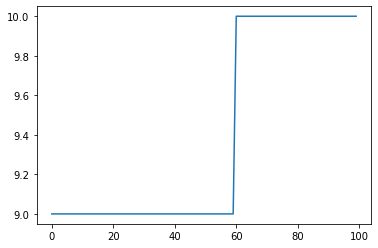

In [213]:
#背包问题，遗传算法,最优结果为12
import random
import numpy as np
import matplotlib.pyplot as plt

count_chromo = 4  #染色体条数
W = [2, 3, 4, 5]
V = [3, 4, 5, 6]
chromo_len = len(V)
WEIGHT = 8  #背包总重量
cp = 0.8  #交叉概率
mp = 0.1  #变异概率
weight_list = []
value_list = []
C = [[0] * chromo_len for i in range(count_chromo)]
C_new = [[0] * chromo_len for i in range(count_chromo)]
p = [0 for i in range(count_chromo)]
tick = 0


def init_chromo():  #初始化染色体
    global count_chromo, chromo_len
    for i in range(count_chromo):  #条染色体
        for j in range(chromo_len):
            C[i][j] = np.random.randint(0, 2)


def fitness():  #计算适应度，也就是每个染色体的方案的总价值
    weight_list.clear()
    value_list.clear()
    for chromo in C:  # 遍历所有的染色体
        value = 0
        weight = 0
        for i, chro in enumerate(chromo):  #计算每个染色体的总重量和总价值
            if (chro == 1):
                weight += W[i]
                value += V[i]
        value_list.append(value)
        weight_list.append(weight)


def filter1():  #删除不满足的染色体,并添加符合的染色体
    global count_chromo, chromo_len, WEIGHT
    site = []  #不满足的染色体位置
    for i, w in enumerate(weight_list):  #统计不满足的染色体的位置
        if (w > WEIGHT or w == 0):
            site.append(i)
    #print("不满足的染色体位置:", site)
    if (len(site) != 0):
        for si in site:  #添加符合的染色体
            while (1):
                c = []
                for _ in range(chromo_len):  #新随机生成一个染色体
                    c.append(np.random.randint(0, 2))
                weight = 0
                value = 0
                for i, chro in enumerate(c):  #计算这个染色体的重量和价值
                    if (chro == 1):
                        weight += W[i]
                        value += V[i]
                if (weight < WEIGHT):  #如果重量满足，则替换不满足的染色体位置
                    C[si] = c
                    value_list[si] = value
                    weight_list[si] = weight
                    break
    #print("修正后的weight_list:", weight_list, "value_list:", value_list)


def calculate_rate():  #计算轮盘赌的分配概率
    global chromo_len
    sum1 = sum(value_list)
    for i in range(chromo_len):
        p[i] = round((value_list[i] / sum1), 2)


def lunpandu(p):  #轮盘赌选择一个染色体
    m = 0
    r = round(random.random(), 2) - 0.01
    for i, pp in enumerate(p):
        m = m + pp
        if (r <= m):
            return i


def crossover(c1, c2):  #交叉产生下一代
    global cp, chromo_len
    p = random.random()
    new_c1 = c1
    new_c2 = c2
    if (p < cp and c1 != c2):  #如果满足概率且两个不相等,则交叉产生两个后代
        num = random.randint(0, chromo_len)
        new_c1 = c1[:num] + c2[num:]
        new_c2 = c2[:num] + c1[num:]
    return new_c1, new_c2


def change(c1, c2):
    global mp, chromo_len
    p1 = random.random()
    p2 = random.random()
    flag = 0
    if (p1 < mp):  #以一定概率选择染色体上的一个基因变异
        c1_select = np.random.randint(0, chromo_len)
        if (c1[c1_select] == 0):
            c1[c1_select] = 1
        else:
            c1[c1_select] = 0
        flag = 1
    if (p2 < mp):  #以一定概率选择染色体上的一个基因变异
        c2_select = np.random.randint(0, chromo_len)
        if (c2[c2_select] == 0):
            c2[c2_select] = 1
        else:
            c2[c2_select] = 0
        flag = 1
    #if(flag==1):
    #print("发生变异")
    return c1, c2


if __name__ == '__main__':
    best_score = []
    x_data = []
    best_score1 = 0
    for x1 in range(10):
        init_chromo()  #随机初始化染色体
        fitness()  #计算适应度，也就是每个染色体的方案的总价值
        filter1()  #删除所有不符合的染色体,并添加符合的染色体
        calculate_rate()  #计算轮盘赌选择概率
        print(
            "---------------------------------------------------------------")
        for x in range(10):
            for i in range(0, chromo_len, 2):  #生成新的一代C_new
                select_1 = lunpandu(p)  #选择两个染色体的编号
                select_2 = lunpandu(p)
                c1, c2 = crossover(
                    C[select_1],
                    C[select_2])  #如果两个染色体编号不同且满足交叉概率，则交叉,得到c1,c2两个染色体
                c1, c2 = change(c1, c2)  #如果满足变异概率则变异
                C_new[i] = c1
                C_new[i + 1] = c2
            C = C_new
            fitness()
            filter1()  #删除所有不符合的染色体,并添加符合的染色体
            tmp_best_score = max(value_list)
            if (best_score1 < tmp_best_score):
                best_score1 = tmp_best_score
            best_score.append(best_score1)
            x_data.append(tick)
            print("第{}代的最优值为{},全局最优值为{}".format(tick + 1, tmp_best_score,best_score[-1]))
            tick += 1
    plt.plot(x_data, best_score)
    plt.show()

In [201]:
best_score

[4, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [142]:
site=[]
for i in site:
    print(i)